<a href="https://colab.research.google.com/github/aman-welzin/credzin/blob/main/rag/CRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U langchain langchain-community langchain_experimental gradio pymupdf python-docx ollama langchain-huggingface langchain-neo4j lxml-html-clean pillow langgraph yfiles_jupyter_graphs neo4j langchain-neo4j

# Install Ollama and CUDA drivers
import os
!nvidia-smi
!curl https://ollama.ai/install.sh | sh
!echo 'debconf debconf/frontend select Noninteractive' | sudo debconf-set-selections
!sudo apt-get update && sudo apt-get install -y cuda-drivers
# Set LD_LIBRARY_PATH so the system NVIDIA library
os.environ.update({'LD_LIBRARY_PATH': '/usr/lib64-nvidia'})

!nohup ollama serve &
!ollama ps
# !ollama pull mistral-small3.1
!ollama pull llama3.2
!ollama list

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.

In [ ]:
!pip install --upgrade --force-reinstall numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six

In [4]:
import io
import os, uuid
from datetime import datetime
import pandas as pd
from tqdm.notebook import tqdm
import json
import re
import urllib
import pprint
from IPython import embed
import matplotlib.font_manager
import matplotlib as mpl
from yfiles_jupyter_graphs import GraphWidget
import codecs
import base64
import PIL
from PIL import Image, ImageFont, ImageDraw, ImageColor
import textwrap
from IPython.display import Image, display
from neo4j import GraphDatabase
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain_community.llms import Ollama
from langchain_core.prompts import ChatPromptTemplate
from langchain import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import AIMessage, HumanMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.schema import Document
from langchain.docstore import InMemoryDocstore
from langchain.retrievers import ParentDocumentRetriever
from google.colab import userdata
from langgraph.graph.message import add_messages
from langgraph.graph import END, StateGraph, START
from langchain.graphs import Neo4jGraph
from typing import List
from typing_extensions import TypedDict, Annotated
from langchain_experimental.graph_transformers import LLMGraphTransformer
from pydantic import BaseModel, Field
from langchain_community.vectorstores import Neo4jVector
from neo4j_graphrag.retrievers import HybridRetriever

import time
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [5]:
EMBEDDING_MODEL = "sentence-transformers/static-retrieval-mrl-en-v1"
LLAMA_MODEL = "llama3.2"

In [ ]:
# drive.mount('/content/drive')

# DB_PATH = '//content/drive/MyDrive/YANA/YanaNewsProd.db'

# conn = sqlite3.connect(DB_PATH)
# cursor = conn.cursor()
# conn    = sqlite3.connect(DB_PATH)

Mounted at /content/drive


In [6]:
# from langchain_qdrant import FastEmbedSparse, QdrantVectorStore, RetrievalMode
# from qdrant_client import QdrantClient, models
# from qdrant_client.http.models import Distance, SparseVectorParams, VectorParams


# client = QdrantClient(":memory:")

# # 2) (Re)create your hybrid collection
# client.recreate_collection(
#     collection_name="my_documents",
#     vectors_config={
#         "dense": VectorParams(size=1024, distance=Distance.COSINE)
#     },
#     sparse_vectors_config={
#         "sparse": SparseVectorParams(
#             index=models.SparseIndexParams(on_disk=False)
#         )
#     },
# )


# Wait 60 seconds before connecting using these details, or login to https://console.neo4j.io to validate the Aura Instance is available
NEO4J_URI="neo4j+s://a5d9b149.databases.neo4j.io"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="TWMKINAuUNN5i4vffQz0pTysPgnrQvnQv6f5jvAY9fY"
AURA_INSTANCEID="a5d9b149"
AURA_INSTANCENAME="Instance01"

AUTH=(NEO4J_USERNAME, NEO4J_PASSWORD)
with GraphDatabase.driver(NEO4J_URI, auth=AUTH) as driver:
    driver.verify_connectivity()

os.environ["NEO4J_URI"] = NEO4J_URI
os.environ["NEO4J_USERNAME"] = NEO4J_USERNAME
os.environ["NEO4J_PASSWORD"] = NEO4J_PASSWORD

graph = Neo4jGraph()

driver = GraphDatabase.driver(
    uri=os.environ["NEO4J_URI"],
    auth=(os.environ["NEO4J_USERNAME"], os.environ["NEO4J_PASSWORD"])
)

In [ ]:
# !pip install transformers fastembed-gpu

In [ ]:
# rows = cursor.execute(
#     f"SELECT title,batch_dt, desc FROM clean_news_new WHERE batch_dt = '2025-04-23'"
# ).fetchall()
# clean_news = pd.DataFrame(rows, columns=[description[0] for description in cursor.description])

# # 2. Init your splitter & embedder
# splitter   = RecursiveCharacterTextSplitter(chunk_size=5000, chunk_overlap=0)
# embedder  = HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL)
# sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25")

# documents = []

# for _, row in clean_news.iterrows():
#     # Build one long string per article
#     content = "\n".join(
#         f"## {col}\n{row[col]}"
#         for col in clean_news.columns
#         if col not in ("img",)
#     )

#     # Split into chunks
#     chunks = splitter.create_documents([content])

#     for chunk in chunks:
#         # 🧹 CLEANING: Ensure page_content is a string
#         if isinstance(chunk.page_content, list):
#             clean_content = " ".join(chunk.page_content)
#         elif not isinstance(chunk.page_content, str):
#             clean_content = str(chunk.page_content)
#         else:
#             clean_content = chunk.page_content

#         # Append cleaned document
#         documents.append(
#             Document(
#                 page_content=clean_content,
#                 metadata={
#                     "title": row["title"],
#                     "batch_dt": row["batch_dt"]
#                 }
#             )
#         )

# from langchain_qdrant import QdrantVectorStore

# # 5. Push all documents into Weaviate at once
# qdrant = QdrantVectorStore(
#     client=client,
#     collection_name="my_documents",
#     embedding=embedder,             # your HuggingFaceEmbeddings instance
#     sparse_embedding=sparse_embeddings,
#     retrieval_mode=RetrievalMode.HYBRID,
#     vector_name="dense",
#     sparse_vector_name="sparse",
# )

# # 4) Push your docs into Qdrant
# qdrant.add_documents(documents=documents)


def read_files():
    print("Reading all the files in the directory...")

    csv_path = '/content/cc_feats.csv'

    data_top5 = pd.read_csv(csv_path)
    data = data_top5.head(5)
    print(f"Loaded {len(data)} rows from the CSV file.")
    return data

raw_document = read_files()
len(raw_document)

if isinstance(raw_document, pd.DataFrame):
    text_list = []
    for _, row in raw_document.iterrows():
        row_data = []
        for col in raw_document.columns:
            value = row[col]
            if pd.notna(value):
                value = str(value)
                row_data.append(f"{col.replace('_', ' ').capitalize()}: {value}")
        text = " | ".join(row_data)
        text_list.append(text)
else:
    text_list = [raw_document]

documents = [Document(page_content=text) for text in text_list]
print("printinf documnets",documents)
print(type(documents))

llm = Ollama(model="LLama3.2")
llm_transformer = LLMGraphTransformer(llm=llm)


graph_documents = llm_transformer.convert_to_graph_documents(documents)

graph_documents

graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
)

embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

vector_index_similarity = Neo4jVector.from_documents(
    documents=documents,
    embedding=embedding,
    index_name="axis_credit_card_index",
    node_label="Document",
    text_node_property="page_content",  # property name in text_chunks
    embedding_node_property="embedding",
    graph=graph
)

default_cypher = "MATCH (n) OPTIONAL MATCH (n)-[r]->(m) RETURN n, r, m"

def showGraph(cypher: str = default_cypher):
    # create a neo4j session to run queries
    driver = GraphDatabase.driver(
        uri = os.environ["NEO4J_URI"],
        auth = (os.environ["NEO4J_USERNAME"],
                os.environ["NEO4J_PASSWORD"]))

    session = driver.session()
    widget = GraphWidget(graph = session.run(cypher).graph())
    widget.node_label_mapping = 'id'
    display(widget)
    return widget

showGraph()

Reading all the files in the directory...
Loaded 5 rows from the CSV file.
printinf documnets [Document(metadata={}, page_content='Bank name: Axis | Card name: IndianOil Axis BankCredit Card | Joining fee: ₹ 500.00 | Annual fee: ₹ 500.00 | Card type: retail card | Card category: [fuel, shopping] | Movie offer: False | Reward points: False | Rewards: "[{\'Title\': \'Welcome Benefit - Earn 100% valueback on Fuel\', \'Description\': \'Get upto 1250 EDGE REWARD points on first fuel transactions with your INDIANOIL AXIS BANK Credit Card within first 30 days of card issuance Click here to view the terms and conditions.\', \'Terms and Conditions Link\': \'No link available\'}, {\'Title\': \'Accelerated Reward points at any IOCL fuel outlets\', \'Description\': \'Enjoy benefit of 4% value back on fuel transactions by earning 20 reward points per INR 100 spent at any IOCL fuel outlet in India.Transact in India at IOCL fuel outlet between INR 400 to INR 4000 to avail the offer.Maximum eligible s

In [ ]:
from neo4j_graphrag.retrievers import HybridRetriever

In [ ]:
# query = "Give me news related to Vikram"
# qdrant.retrieval_mode = RetrievalMode.HYBRID
# results = qdrant.similarity_search_with_score(
#     query=query, k=4
# )
# for doc, score in results:
#     print(f"* [SIM={score:3f}] {doc.page_content} [{doc.metadata}]")

embedder  = HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL)

with driver.session() as session:
    session.run("""
            CREATE FULLTEXT INDEX creditCardFulltext2 IF NOT EXISTS
            FOR (n:Document2)
            ON EACH [n.page_content2]
        """)
# Step 2: Setup Hybrid Retriever
retriever = HybridRetriever(
    driver=driver,
    vector_index_name="axis_credit_card_index1",
    fulltext_index_name="creditCardFulltext2",
    embedder=embedder,
    return_properties=["page_content"],
)

# Step 3: Fetch relevant documents
results = retriever.search(query_text=query, top_k=5)
print("Retriever Result:", results)

* [SIM=0.500000] ## title
Newlywed Navy officer, US-based techie & more: The heartbreaking stories of tourists killed in Pahalgam
## batch_dt
2025-04-23
## desc
Lieutenant Vinay Narwal, a 26-year-old Indian Navy officer from Haryana’s Karnal who got married just seven days ago, and Bitan Adhikary, a US-based TCS employee originally from Kolkata, were among those killed in the Pahalgam terror attack in Jammu and Kashmir. Notably, Narwal had travelled to Kashmir for a short holiday with his wife after their wedding, while Adhikary was also visiting the region with his family. Among the 26 gunned down by terrorists, most were tourists. These are their stories read more

A young Indian Navy officer who got married just a week ago, an Intelligence Bureau (IB) officer shot in front of his wife and children, and US-based TCS employee originally from Kolkata were among those killed in the Pahalgam terror attack.

The attack claimed the lives of at least 26 people in Jammu and Kashmir’s Pahalga

In [ ]:
%pip install -qU langchain-ollama

In [ ]:
from langchain_ollama import ChatOllama

def grade_documents(query, k=4):
    class GradeDocument(BaseModel):
        score: str = Field(description="Document is relevant to the question, 'yes' or 'no'")

    llm_grader = ChatOllama(
        base_url="http://localhost:11434",
        model="llama3.2",
    )
    structured_llm_grader = llm_grader.with_structured_output(GradeDocument)

    grade_prompt = ChatPromptTemplate.from_messages([
        ("human", """You are a grader assessing whether an answer is useful to resolve a question.

Here is the answer:
<answer>
{generation}
</answer>
Here is the question:
<question>
{question}
</question>
Give a binary score 'yes' or 'no' to indicate whether the answer is useful to resolve a question.
Provide the binary score as a JSON with a single key 'score' and no preamble or explanation.""")
    ])

    retrieval_grader = grade_prompt | structured_llm_grader

 # Adjust this import based on where your db object is defined
    docs = qdrant.similarity_search_with_score(query, k=k)

    graded_results = []

    for i, (doc, score) in enumerate(docs):
        grade_result = retrieval_grader.invoke({
            "question": query,
            "generation": doc.page_content
        })
        graded_results.append({
            "document_number": i + 1,
            "title": doc.metadata.get("title", "No Title Found"),
            "similarity_score": score,
            "grade": grade_result.score.strip().lower(),
            "content": doc.page_content,
            "original_query": query
        })

    return graded_results


In [ ]:
results = grade_documents("Give me some news regarding Lionel Messi")
print(results)

[{'document_number': 1, 'title': 'Vini Jr. OTT Release Date: When and where to watch documentary on Real Madrid player’s life', 'similarity_score': 0.5, 'grade': 'no', 'content': '## title\nVini Jr. OTT Release Date: When and where to watch documentary on Real Madrid player’s life\n## batch_dt\n2025-04-23\n## desc\nVini Jr. OTT Release Date: Mark your calendars! Netflix is all set to drop a documentary that football fans won’t want to miss. Regionally titled Baila, Vini, this new release dives deep into the life of one of football’s brightest stars - Vinicius Jr. Whether you’re a die-hard Real Madrid supporter or just love a good underdog story, this film has something for everyone. And yes, Vini Jr. officially premieres on Netflix on May 15.\n\nWhat’s Vini Jr. all about?\n\nVini Jr. follows the rise of Vinicius Jr., from his humble beginnings in Brazil to becoming a global football sensation and one of the key players for Real Madrid. The documentary captures emotional and career-defi

In [ ]:
def summarize_documents(graded_results, query):
    summarize_prompt = PromptTemplate(
        input_variables=["context", "question"],
        template="""
Here is the article (do not invent anything beyond this text):
{context}

You are an expert AI news editor with deep knowledge of viral content, SEO optimization, and engaging storytelling.
Your task is to transform the given article into:
1. A **highly catchy, click-worthy headline** (50-100 characters).
2. A **concise yet compelling news summary** (200-350 characters) that retains factual accuracy while maximizing reader interest.

### Instructions:
- **Headline**:
  - Use power words
  - Include keywords for SEO
  - Spark curiosity or urgency (e.g., "Why X Happened" or "How Y Will Change Everything").
- **Summary**:
  - Lead with the most critical fact or emotion.
  - Avoid fluff; keep sentences short and impactful.
  - Maintain 100% factual alignment with the source article.

### Output Format (STRICTLY JSON):
json
{{
    "llm_headline": "Your headline here (50-100 chars)",
    "llm_news": "Your summary here (350-500 chars). Focus on the 'who, what, why' in the first sentence."
}}
"""
    )

    llm_summarizer = ChatOllama(
        base_url="http://localhost:11434",
        temperature=0.1,
        model="llama3.2",
    )

    rag_chain = summarize_prompt | llm_summarizer | StrOutputParser()

    summarized_results = []

    for item in graded_results:
        if item["grade"] == "yes":
            summary = rag_chain.invoke({
                "context": item["content"],
                "question": query
            })

            summarized_results.append({
                "document_number": item["document_number"],
                "title": item["title"],
                "similarity_score": item["similarity_score"],
                "summary": summary,
                "retrieved_contexts": [item["content"]]  # ADD THIS LINE
            })

    return summarized_results


In [ ]:
summarize_documents(results, "Give me some news regarding Lionel Messi")

[]

In [ ]:
def rewrite_questions(graded_results):
    answers = [item['grade'] for item in graded_results]
    no_count = answers.count('no')

    rewritten_questions = []

    if no_count > 0:
        llm_rewriter = ChatOllama(
            base_url="http://localhost:11434",
            temperature=0.7,
            model="llama3.2",
        )

        system = """You are a question rewriter. Convert the input question into a concise, web-search-optimized version. Return ONLY the improved question, no explanations or formatting."""
        re_write_prompt = ChatPromptTemplate.from_messages(
            [
                ("system", system),
                ("human", "Improve this question for web search: {question}"),
            ]
        )

        question_rewriter = re_write_prompt | llm_rewriter | StrOutputParser()

        original_query = graded_results[0]["original_query"] if graded_results else ""

        for _ in range(no_count):
            improved_question = question_rewriter.invoke({"question": original_query})
            rewritten_questions.append(improved_question)

    return rewritten_questions

In [ ]:
rewriten_ques = rewrite_questions(results)
print(rewriten_ques)

['Lionel Messi latest news and updates', 'Lionel Messi latest news and updates', 'Lionel Messi recent news', 'Lionel Messi recent news and updates']


In [ ]:
def search_with_rewritten_questions(rewritten_questions):
    os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
    tool = TavilySearchResults(max_results=2)

    graded_results_from_web = []

    for idx, question in enumerate(rewritten_questions):
        search_results = tool.invoke({"query": question})

        combined_content = "\n".join(item["content"] for item in search_results if "content" in item)

        graded_results_from_web.append({
            "document_number": idx + 1,
            "title": f"Web Search Result {idx + 1}",
            "similarity_score": 1.0,
            "grade": "yes",
            "content": combined_content,
            "tool_call": {
                "tool_name": "TavilySearchResults",
                "tool_input": question,
                "tool_output": search_results,   # capture the raw search result
            }
        })

    return graded_results_from_web


In [ ]:
search_with_rewritten_questions(rewriten_ques)

[{'document_number': 1,
  'title': 'Web Search Result 1',
  'similarity_score': 1.0,
  'grade': 'yes',
  'content': "Lionel Messi\xa0  \n      Share\n\nShare\n\nLatest\n\nAbout our Lionel Messi news\n\nLatest Lionel Messi news on the all-time great Argentine footballer, who plays as an attacker for the MLS side Inter Miami. [...] In December 2022, Messi led Argentina to victory in the World Cup whilst also winning the Golden Ball for best player and scoring seven goals, including two in the final against defending champions France. Messi also won the Copa America with Argentina in 2021.\n\nNews Now\n\nOur Sites\n\nWork with us\n\nLegal\n\n© Copyright 1997 - 2025 NewsNow Publishing\n               Limited. All rights reserved. [...] Born in 1987, Leo Messi is one of the greatest players in football history, winning 10 La Liga titles and four Champions Leagues with Barca, as well as six Ballons d'Or during his time at the Camp Nou. After a phenomenally successful 17 years in the Barca fi

In [ ]:
def get_clean_question(question_field):
    """Utility to clean question field safely."""
    if isinstance(question_field, list):
        # If list of messages, find the first non-empty
        for msg in question_field:
            if hasattr(msg, 'content') and msg.content.strip():
                return msg.content.strip()
        return ""
    elif hasattr(question_field, 'content'):
        return question_field.content.strip()
    elif isinstance(question_field, str):
        return question_field.strip()
    else:
        return str(question_field)


In [ ]:
import operator

class GraphState(TypedDict):
    graded_results: Annotated[List[dict], operator.add]
    generations_from_retriever: Annotated[List[dict], operator.add]
    generations_from_web: Annotated[List[dict], operator.add]
    messages: Annotated[List[str], operator.add]
    question: str
    no_count: int

    rewritten_questions: Annotated[List[str], operator.add]
    graded_results_from_web: Annotated[List[dict], operator.add]
    final_output: Annotated[List[dict], operator.add]

In [ ]:
def grade_docs(state: GraphState) -> dict:
    print("---GRADE DOCUMENTS---")

    question = state["question"]
    print(question)

    question = get_clean_question(state["question"])
    graded_results = grade_documents(question)

    no_count = sum(1 for item in graded_results if item["grade"] == "no")

    return {
        "graded_results": graded_results,
        "no_count": no_count,
        "messages": [f"Graded: {len(graded_results) - no_count} yes, {no_count} no"]
    }

def generate_from_relevant(state: GraphState) -> dict:
    print("---GENERATE FROM RELEVANT DOCS---")

    graded_results = state.get("graded_results", [])
    relevant_docs = [doc for doc in graded_results if doc["grade"] == "yes"]
    query = state.get("question", "")

    generations = summarize_documents(relevant_docs, query)

    return {
        "generations_from_retriever": generations,
        "messages": [f"Generated {len(generations)} news from retriever"]
    }

def rewrite_ques(state: GraphState) -> dict:
    print("---REWRITE QUESTIONS FOR NO DOCS---")

    graded_results = state.get("graded_results", [])


    rewritten_questions = rewrite_questions(graded_results)

    return {
        "rewritten_questions": rewritten_questions,
        "messages": [f"Rewrote {len(rewritten_questions)} questions"]
    }
def web_search(state: GraphState) -> dict:
    print("---WEB SEARCH FOR REWRITTEN QUESTIONS---")

    rewritten_questions = state.get("rewritten_questions", [])
    if not rewritten_questions:
        return {}

    graded_results_from_web = search_with_rewritten_questions(rewritten_questions)

    return {
        "graded_results_from_web": graded_results_from_web,
        "messages": [f"Found {len(graded_results_from_web)} web documents"]
    }

def generate_from_web(state: GraphState) -> dict:
    print("---GENERATE FROM WEB SEARCH DOCS---")

    graded_results_from_web = state.get("graded_results_from_web", [])
    if not graded_results_from_web:
        return {}

    query = state.get("question", "")

    generations = summarize_documents(graded_results_from_web, query)

    return {
        "generations_from_web": generations,
        "messages": [f"Generated {len(generations)} news from web search"]
    }

def combine_results(state: GraphState) -> dict:
    print("---COMBINE FINAL RESULTS---")

    retriever_news = state.get("generations_from_retriever", [])
    web_news = state.get("generations_from_web", [])

    final_output = retriever_news + web_news

    # only return a dict of state-updates—no tuple!
    # return both the final_output and the status message
    return {
        "final_output": final_output,
        "messages": [f"Final output has {len(final_output)} news articles"]
    }

def decide_next_node(state):
    if state["no_count"] == 0:
        return "generate_from_relevant"
    else:
        return "rewrite_ques"

In [ ]:
workflow = StateGraph(GraphState)

# Add nodes
workflow.add_node("grade_docs", grade_docs)
workflow.add_node("generate_from_relevant", generate_from_relevant)
workflow.add_node("rewrite_ques", rewrite_ques)
workflow.add_node("web_search", web_search)
workflow.add_node("generate_from_web", generate_from_web)
workflow.add_node("combine_results", combine_results)

# Entry
workflow.set_entry_point("grade_docs")

# 1) Always run the retriever branch
workflow.add_edge("grade_docs", "generate_from_relevant")

# 2) Conditionally run the rewrite/web branch if no docs
workflow.add_conditional_edges(
    "grade_docs",
    decide_next_node,
    {
        "rewrite_ques": "rewrite_ques",
        "generate_from_relevant": "generate_from_relevant",
    }
)

# Continue the web branch
workflow.add_edge("rewrite_ques",     "web_search")
workflow.add_edge("web_search",      "generate_from_web")

# Fan‐in both branches into combine_results
workflow.add_edge("generate_from_relevant", "combine_results")
workflow.add_edge("generate_from_web",      "combine_results")

# End
workflow.add_edge("combine_results", END)

# Compile
app = workflow.compile()


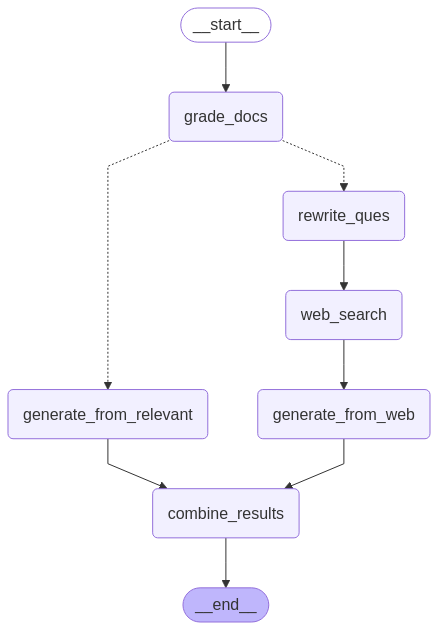

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
from ragas import evaluate
from ragas.metrics import (
    LLMContextPrecisionWithoutReference,
    SummarizationScore
)
from datasets import Dataset
from langsmith import Client
from langchain_openai import ChatOpenAI
from langchain_core.tracers import LangChainTracer

# 1. Initialize LangSmith - this will create the project if it doesn't exist
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGSMITH_API_KEY"] = userdata.get("LANGSMITH_API_KEY")
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

# Set project name - will be created automatically on first run
PROJECT_NAME = "agent-metrics"
os.environ["LANGSMITH_PROJECT"] = PROJECT_NAME

# Initialize client and tracer
client = Client()
tracer = LangChainTracer(project_name=PROJECT_NAME)

# 2. Verify/Create project
try:
    client.read_project(project_name=PROJECT_NAME)
except:
    print(f"Creating new project: {PROJECT_NAME}")
    client.create_project(PROJECT_NAME)

# 3. Evaluation setup (unchanged)
evaluation_llm = ChatOpenAI(temperature=0)
context_precision_metric = LLMContextPrecisionWithoutReference()
summarization_metric = SummarizationScore()

def eval_context_precision(question: str, graded_results: list[dict]) -> list[dict]:
    """
    For each retrieved doc, score how likely it is relevant to the question
    (no human reference needed) :contentReference[oaicite:0]{index=0}.
    """
    out = []
    for doc in graded_results:
        ds = Dataset.from_dict({
            "user_input":        [question],
            "response":          [doc["content"]],
            "retrieved_contexts":[[doc["content"]]],
        })
        result = evaluate(ds, metrics=[context_precision_metric], callbacks=[tracer])
        out.append({
            **doc,
            "context_precision": result["llm_context_precision_without_reference"]
        })
    return out

def eval_tool_call_relevance(graded_results_from_web: list[dict]) -> list[dict]:
    out = []

    for doc in graded_results_from_web:
        tool_call = doc.get("tool_call", {})
        if not tool_call:
            out.append({**doc, "tool_call_relevance_score": None})
            continue

        user_input = tool_call.get("tool_input", "")
        tool_output = "\n".join(item.get("content", "") for item in tool_call.get("tool_output", []))

        # Create fake dataset for Ragas
        ds = Dataset.from_dict({
            "user_input": [user_input],
            "retrieved_contexts": [[tool_output]],
            "response": [doc["content"]],  # or the summarized content
        })

        # use LLMContextPrecisionWithoutReference metric
        result = evaluate(ds, metrics=[context_precision_metric], callbacks=[tracer])

        out.append({**doc, "tool_call_relevance_score": result["llm_context_precision_without_reference"]})

    return out



def eval_summarization(question: str, final_summaries: list[dict]) -> list[dict]:
    out = []
    for doc in final_summaries:
        retrieved_contexts = doc.get("retrieved_contexts", [])

        if not retrieved_contexts:
            out.append({**doc, "summarization_score": None})
            continue

        ds = Dataset.from_dict({
            "user_input": [question],
            "reference_contexts": [retrieved_contexts],
            "response": [doc["summary"]],
        })
        result = evaluate(ds, metrics=[summarization_metric], callbacks=[tracer])
        print("\nResult from evaluate():")  # ADD
        print(result)  # ADD


        out.append({**doc, "summarization_score": result["summary_score"]})
    return out

# 3) Updated run_pipeline function
def run_pipeline(user_question):
    inputs = {"question": user_question, "messages": []}
    flattened = {"question": user_question}  # Initialize with question

    for node_output in app.stream(inputs):
        node_name, updates = next(iter(node_output.items()))
        pprint(f"Node '{node_name}':")
        pprint(updates)
        flattened.update(updates)

    # Ensure all required keys exist
    flattened.setdefault("graded_results", [])
    flattened.setdefault("rewritten_questions", [])
    flattened.setdefault("graded_results_from_web", [])
    flattened.setdefault("final_output", [])
    flattened.setdefault("messages", [])


    # Run evaluators
    grade_noise = eval_context_precision(
        flattened["question"],
        flattened["graded_results"]
    )

    tool_acc = eval_tool_call_relevance(flattened["graded_results_from_web"])

    summary_score = eval_summarization(
        flattened["question"],
        flattened.get("final_output", [])
    )

    # Print results
    pprint("=== Grade Noise Sensitivity ===")
    pprint(grade_noise)

    pprint("=== Search Accuracy ===")
    pprint(tool_acc)

    pprint("=== Summarization Score ===")
    pprint(summary_score)

    return {
        **flattened,
        "grade_noise_evals": grade_noise,
        "search_accuracy_evals": tool_acc,
        "summary_score_evals": summary_score,
    }

In [ ]:
run_pipeline("Give me news about Lionel Messi")

---GRADE DOCUMENTS---
Give me news about Lionel Messi
"Node 'grade_docs':"
{'graded_results': [{'content': '## title\n'
                                'Vini Jr. OTT Release Date: When and where to '
                                'watch documentary on Real Madrid player’s '
                                'life\n'
                                '## batch_dt\n'
                                '2025-04-23\n'
                                '## desc\n'
                                'Vini Jr. OTT Release Date: Mark your '
                                'calendars! Netflix is all set to drop a '
                                'documentary that football fans won’t want to '
                                'miss. Regionally titled Baila, Vini, this new '
                                'release dives deep into the life of one of '
                                'football’s brightest stars - Vinicius Jr. '
                                'Whether you’re a die-hard Real Madrid '
       

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]


Result from evaluate():
{'summary_score': 0.3061}


Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]


Result from evaluate():
{'summary_score': 0.2271}


Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]


Result from evaluate():
{'summary_score': 0.3111}


Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]


Result from evaluate():
{'summary_score': 0.2492}
'=== Grade Noise Sensitivity ==='
[{'content': '## title\n'
             'Vini Jr. OTT Release Date: When and where to watch documentary '
             'on Real Madrid player’s life\n'
             '## batch_dt\n'
             '2025-04-23\n'
             '## desc\n'
             'Vini Jr. OTT Release Date: Mark your calendars! Netflix is all '
             'set to drop a documentary that football fans won’t want to miss. '
             'Regionally titled Baila, Vini, this new release dives deep into '
             'the life of one of football’s brightest stars - Vinicius Jr. '
             'Whether you’re a die-hard Real Madrid supporter or just love a '
             'good underdog story, this film has something for everyone. And '
             'yes, Vini Jr. officially premieres on Netflix on May 15.\n'
             '\n'
             'What’s Vini Jr. all about?\n'
             '\n'
             'Vini Jr. follows the rise of Vinicius J

{'question': 'Give me news about Lionel Messi',
 'graded_results': [{'document_number': 1,
   'title': 'Vini Jr. OTT Release Date: When and where to watch documentary on Real Madrid player’s life',
   'similarity_score': 0.5,
   'grade': 'no',
   'content': '## title\nVini Jr. OTT Release Date: When and where to watch documentary on Real Madrid player’s life\n## batch_dt\n2025-04-23\n## desc\nVini Jr. OTT Release Date: Mark your calendars! Netflix is all set to drop a documentary that football fans won’t want to miss. Regionally titled Baila, Vini, this new release dives deep into the life of one of football’s brightest stars - Vinicius Jr. Whether you’re a die-hard Real Madrid supporter or just love a good underdog story, this film has something for everyone. And yes, Vini Jr. officially premieres on Netflix on May 15.\n\nWhat’s Vini Jr. all about?\n\nVini Jr. follows the rise of Vinicius Jr., from his humble beginnings in Brazil to becoming a global football sensation and one of the 

In [ ]:
from pprint import pprint

def run_pipeline(user_question):
    inputs = {
        "question": user_question,
        "messages": [],
    }
    # flattened will hold all keys (graded_results, no_count, final_output, etc.) at top level
    flattened = {}
    for node_output in app.stream(inputs):
        # node_output is e.g. { "grade_docs": { … } }
        node_name, updates = next(iter(node_output.items()))
        pprint(f"Node '{node_name}':")
        pprint(updates)

        # Merge the *inner* dict into our flat state
        flattened.update(updates)

    # After streaming all nodes, print the final combined result
    if "final_output" in flattened:
        pprint("Final combined output:")
        pprint(flattened["final_output"])
    else:
        pprint("No 'final_output' found in the final state")


In [ ]:
run_pipeline("Give me news about PM Modi")

---GRADE DOCUMENTS---
Give me news about PM Modi
"Node 'grade_docs':"
{'graded_results': [{'content': '## title\n'
                                "PM's plane used Pak airspace to Saudi, "
                                'avoided it while returning after J&K attack\n'
                                '## batch_dt\n'
                                '2025-04-23\n'
                                '## desc\n'
                                "Prime Minister Narendra Modi's plane avoided "
                                'Pakistan airspace as he flew back from Jeddah '
                                'to New Delhi after cutting short his trip to '
                                'Saudi Arabia following the terror attack in '
                                "Jammu and Kashmir's Pahalgam. PM Modi "
                                'returned to Delhi on Wednesday morning after '
                                'terrorists opened fire on a group of '
                                'tourists, leav

In [ ]:
from pprint import pprint

def run_pipeline(user_question):
    inputs = {
        "question": user_question,
        "messages": [],
    }
    # flattened will hold all keys (graded_results, no_count, final_output, etc.) at top level
    flattened = {}
    for node_output in app.stream(inputs):
        # node_output is e.g. { "grade_docs": { … } }
        node_name, updates = next(iter(node_output.items()))
        pprint(f"Node '{node_name}':")
        pprint(updates)

        # Merge the *inner* dict into our flat state
        flattened.update(updates)

    # After streaming all nodes, print the final combined result
    if "final_output" in flattened:
        pprint("Final combined output:")
        pprint(flattened["final_output"])
    else:
        pprint("No 'final_output' found in the final state")


In [ ]:
run_pipeline("Give me news about Pahalgam")

---GRADE DOCUMENTS---
Give me news about Pahalgam
"Node 'grade_docs':"
{'graded_results': [{'content': '## title\n'
                                "Pahalgam Terror Attack: 'URI- The Surgical "
                                "Strike' actor Vicky Kaushal condemns the "
                                "attack in Kashmir: 'Can't imagine the pain "
                                "of...'\n"
                                '## batch_dt\n'
                                '2025-04-23\n'
                                '## desc\n'
                                'Vicky Kaushal took to Instagram and wrote, '
                                '“Can’t imagine the pain of the family members '
                                'who lost their loved ones in the absolutely '
                                'inhumane act of terrorism in Pahalgam. My '
                                'deepest condolences and prayers.” read more\n'
                                '\n'
                                'More 

In [ ]:
run_pipeline("Give me news about Lionel Messi")

---GRADE DOCUMENTS---
Give me news about Lionel Messi
"Node 'grade_docs':"
{'graded_results': [{'content': '## title\n'
                                'Vini Jr. OTT Release Date: When and where to '
                                'watch documentary on Real Madrid player’s '
                                'life\n'
                                '## batch_dt\n'
                                '2025-04-23\n'
                                '## desc\n'
                                'Vini Jr. OTT Release Date: Mark your '
                                'calendars! Netflix is all set to drop a '
                                'documentary that football fans won’t want to '
                                'miss. Regionally titled Baila, Vini, this new '
                                'release dives deep into the life of one of '
                                'football’s brightest stars - Vinicius Jr. '
                                'Whether you’re a die-hard Real Madrid '
       

In [ ]:
run_pipeline("Give me news about IPL")

---GRADE DOCUMENTS---
Give me news about IPL
"Node 'grade_docs':"
{'graded_results': [{'content': '## title\n'
                                'PSL social media buzz: Ubaid slaps Usman by '
                                'mistake, Ramiz Raja mixes up IPL and PSL, '
                                'Warner’s fist bump\n'
                                '## batch_dt\n'
                                '2025-04-23\n'
                                '## desc\n'
                                'The PSL 2025 viral videos on social media are '
                                'garnering a lot of attention. These videos '
                                'include a hilarious accidental slap to a '
                                'funny mix-up between IPL and PSL. read more\n'
                                '\n'
                                'Defending champions Islamabad United have '
                                'made a strong start to the 2025 season of the '
                             

In [ ]:
!pip install langsmith ragas langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fs

In [ ]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'
